In [1]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn
#import torch
print(os.getpid())

509675


# Data folder

In [2]:
from ChromAn.src.file_io.data_organization import search_fovs_in_folders
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1'
# scan subfolders
folders, fovs = search_fovs_in_folders(data_folder)
# correction folder
correction_folder=os.path.join(data_folder, 'Corrections')
if not os.path.exists(correction_folder):
    print(f"creating folder: {correction_folder}")
    os.makedirs(correction_folder)

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1
-- 17 folders, 65 fovs detected.


## Load color_usage

In [3]:
from ChromAn.src.file_io.data_organization import Color_Usage
# Color usage file marks the organization of imaging files
color_usage_filename = os.path.join(data_folder, 'Analysis', 'Color_Usage.csv')
color_usage_df = Color_Usage(color_usage_filename)

- load color_usage from file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/Analysis/Color_Usage.csv


# Illumnation correction

In [4]:

illumination_folder = folders[0]

In [5]:
# shared parameters
single_im_size = np.array([40,2048,2048])
all_colors = ['750','647','488','405']
# image and threads
num_images = 60
num_threads = 15

In [6]:
#reload(illumination)
from ChromAn.src.correction_tools import illumination

-- 60 among 65 dax files will be loaded in data_folder: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  30 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 1.771s.
-- directly load:['748', '637', '545', '477', '405'] illumination profiles for files


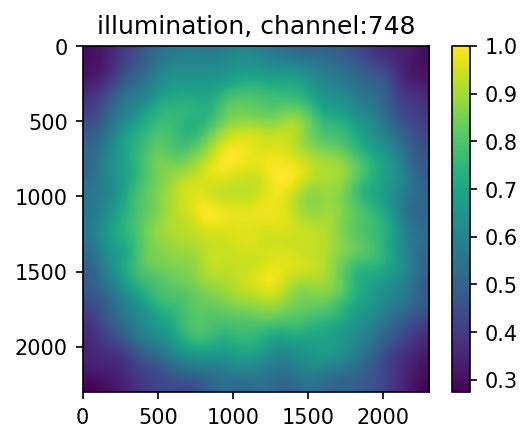

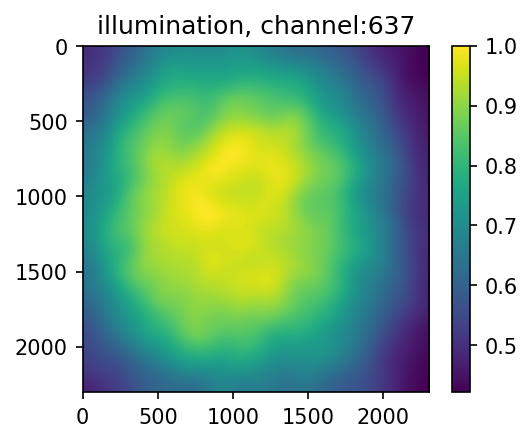

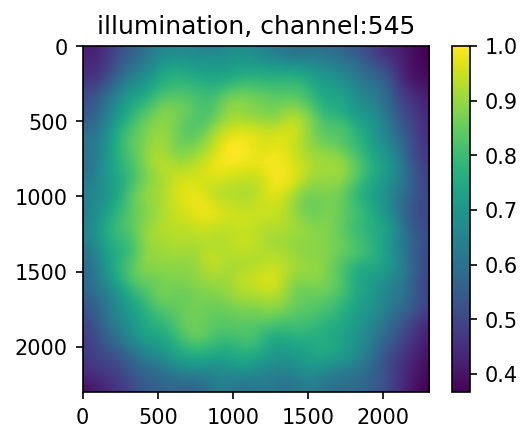

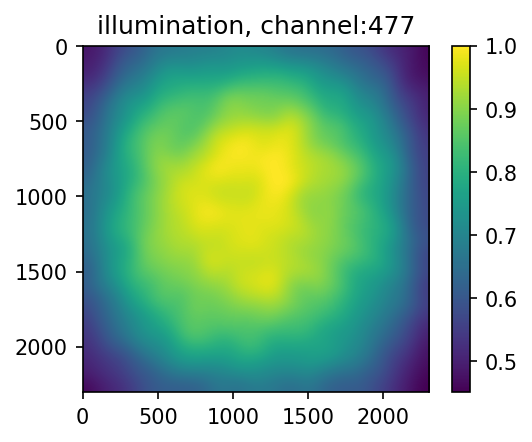

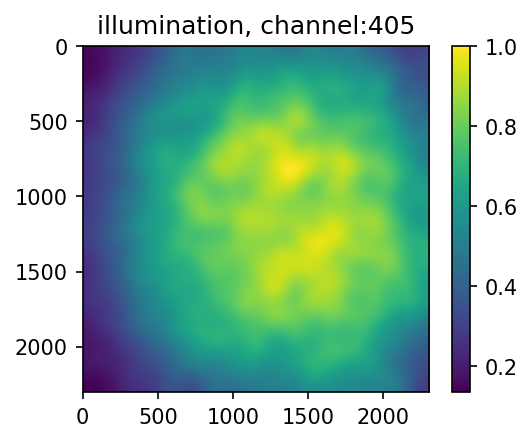

-- finish generating illumination profiles, time:13.31s


In [7]:
illumination_pfs = illumination.Generate_illumination_correction(
    illumination_folder, 
    num_threads=num_threads, parallel=True, num_images=num_images,
    remove_cap=True, cap_th_per=[5, 90],
    save_folder=correction_folder, overwrite=False,
)

# Chromatic abbrevation

In [ ]:
reload(dax_p)

In [4]:
from ChromAn.src.file_io.dax_process import DaxProcesser
daxp = DaxProcesser(os.path.join(folders[0], fovs[0]))

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_00.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_00_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']


In [5]:
num_chromatic_channels = 3
chroamtic_channels = daxp.channels[:num_chromatic_channels]
print(chroamtic_channels)
chromatic_ref_channel = chroamtic_channels[int(num_chromatic_channels/2)]
print(chromatic_ref_channel)

['748', '637', '545']
637


## 750 to 637

In [6]:
cc_folder = folders[0]
ref_folder = folders[1]
print(f"chromatic_corr_folder: {cc_folder},\nref_folder:{ref_folder}")

chromatic_corr_folder: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1,
ref_folder:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2


In [9]:
from ChromAn.src.correction_tools import chromatic
fiducial_channel = color_usage_df.get_fiducial_channel(color_usage_df)
chromatic_channel = [_ch for _ch, _info in \
                color_usage_df.loc[os.path.basename(cc_folder)].items()
                if _info not in ['empty', 'beads', 'DAPI', np.nan]][0]

-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  30 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 1.614s.
-- loading illumination correction profile from file:
	 637 illumination_correction_637_2304x2304.npy
	 748 illumination_correction_748_2304x2304.npy
	 477 illumination_correction_477_2304x2304.npy
++ generating chromatic info for 45 images in 15 threads in -- directly load from temp_file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_00_channel_748_ref_637.pkl
-- directly load from temp_file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_01_channel_748_ref_637.pkl
-- directly load from temp_file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_02_channel_748_ref_637.pkl
-- directly load from temp_file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic

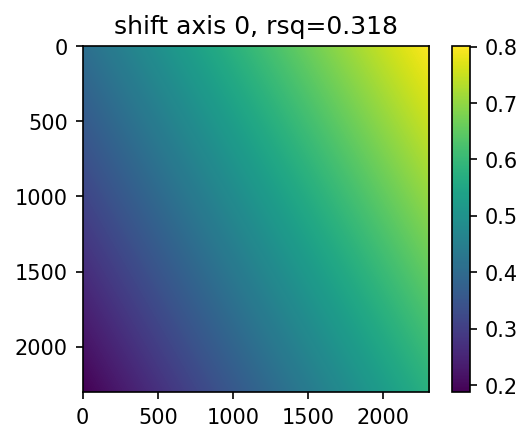

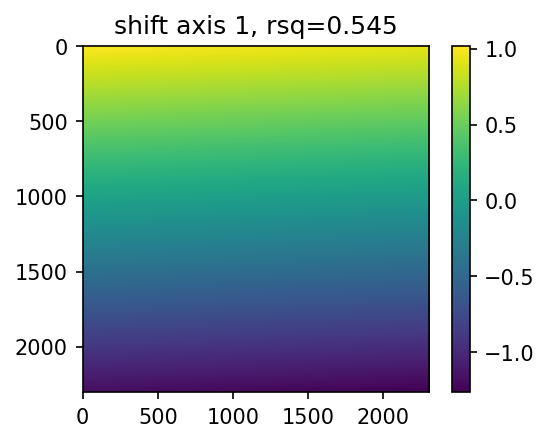

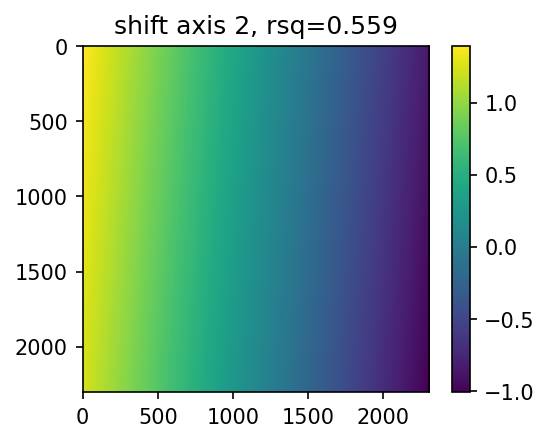

In [14]:
chromatic_pfs, chromatic_consts = chromatic.Generate_chromatic_abbrevation(
    cc_folder, ref_folder, chromatic_channel=chromatic_channel,
    ref_channel=chromatic_ref_channel,
    fiducial_channel=fiducial_channel,
    num_threads=15, start_fov=0, num_images=45,
    parallel=True,
    correction_folder=correction_folder, overwrite_profile=False,
    save_folder=correction_folder,
)

## Check chromatic correction

In [16]:
from ChromAn.src.file_io import dax_process


# 545 to 637

In [17]:
cc_folder = folders[2]
ref_folder = folders[1]
print(f"chromatic_corr_folder: {cc_folder},\nref_folder:{ref_folder}")


chromatic_corr_folder: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3,
ref_folder:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2


In [21]:
from ChromAn.src.correction_tools import chromatic
fiducial_channel = color_usage_df.get_fiducial_channel(color_usage_df)
chromatic_channel = [_ch for _ch, _info in \
                color_usage_df.loc[os.path.basename(cc_folder)].items()
                if _info not in ['empty', 'beads', 'DAPI', np.nan]][0]
print(fiducial_channel, chromatic_channel)

477 545


-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
- Loaded images for channels:['748', '637', '545', '477'] in 6.299s.
-- loading illumination correction profile from file:
	 637 illumination_correction_637_2304x2304.npy
	 545 illumination_correction_545_2304x2304.npy
	 477 illumination_correction_477_2304x2304.npy
++ generating chromatic info for 45 images in 15 threads in Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_00.daxInitialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_01.dax

- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_01_processed.hdf5- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_00_processed.hdf5

-- all used channels: ['748', '637', '545', '477']
-- all used channels: ['748', '637', '545', '477']

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


244 fitted in 70.172s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/Conv_zscan_08.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/Conv_zscan_08_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
241 fitted in 71.815s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/Conv_zscan_06.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/Conv_zscan_06_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
- Loaded images for channels:['545', '477'] in 6.988s.
-- single image size: [  30 2304 2304]
- Correct illumination for channels: ['545', '477']
-- Keep channels: ['545', '477'] for corr_illumination.
- Start illumination correction for channels:['545', '477'].
300 fitted in 67.567s.
Initialize DaxProcesser for file:/lab/weissma

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 317.834s.
- Finished warp correction in 317.909s.
-- fit spots in channel: 545, -- corrected warp for channel 545 in 321.383s.
- Finished warp correction in 321.519s.
-- fit spots in channel: 545, -- corrected warp for channel 545 in 322.816s.
- Finished warp correction in 322.928s.
-- fit spots in channel: 545, -- corrected warp for channel 545 in 325.816s.
- Finished warp correction in 325.955s.
-- fit spots in channel: 545, -- corrected warp for channel 545 in 325.724s.-- corrected warp for channel 545 in 325.320s.

- Finished warp correction in 325.803s.
- Finished warp correction in 325.468s.
-- corrected warp for channel 545 in 324.717s.-- corrected warp for channel 545 in 323.927s.

- Finished warp correction in 324.841s.- Finished warp correction in 324.046s.

-- corrected warp for channel 545 in 324.847s.
-- fit spots in channel: 545- Finished warp correction in 324.971s., 
-- fit spots in channel: 545, -- fit spots in channel: 545, -- fit 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

-- corrected warp for channel 545 in 366.026s.
- Finished warp correction in 366.164s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

300 fitted in 215.080s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

--- saving 34 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_04_channel_545_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_16.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_16_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

- Loaded images for channels:['637', '477'] in 15.746s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

-- corrected illumination for channel 637 in 27.567s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

-- corrected illumination for channel 477 in 26.855s.
- Finished illumination correction in 54.636s.
-- fit spots in channel: 637, 229 fitted in 186.344s.
300 fitted in 180.924s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 13 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_07_channel_545_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_17.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_17_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
300 fitted in 209.556s.
--- saving 9 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_13_channel_545_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_18.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_18_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
--- saving 13 poi

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- Loaded images for channels:['637', '477'] in 15.678s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
300 fitted in 200.372s.
300 fitted in 204.232s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- Loaded images for channels:['637', '477'] in 16.124s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
--- saving 6 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_12_channel_545_ref_637.pkl
- Loaded images for channels:['637', '477'] in 17.456s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
--- saving 23 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_10_channel_545_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_20.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_20_processed.hdf5
-- all used 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- Loaded images for channels:['637', '477'] in 17.968s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- Loaded images for channels:['637', '477'] in 18.363s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
-- corrected illumination for channel 477 in 33.061s.
- Finished illumination correction in 62.759s.
-- corrected illumination for channel 637 in 32.375s.
-- fit spots in channel: 637, -- corrected illumination for channel 637 in 32.777s.
-- corrected illumination for channel 477 in 32.313s.
- Finished illumination correction in 63.247s.
-- fit spots in channel: 637, -- corrected illumination for channel 477 in 32.630s.
- Finished illumination correction in 64.440s.
-- corrected illumination for channel 637 in 32.489s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 281.012s.
-- fit spots in channel: 637, -- corrected illumination for channel 637 in 32.130s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


259 fitted in 241.124s.
--- saving 9 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_14_channel_545_ref_637.pkl
--- saving 14 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_11_channel_545_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_25.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_25_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_26.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_26_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
-- corrected illu

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 477 in 31.549s.
- Finished illumination correction in 64.556s.
-- fit spots in channel: 637, -- fit spots in channel: 637, --- saving 17 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_05_channel_545_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_27.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_27_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
- Loaded images for channels:['637', '477'] in 16.989s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
-- corrected illumination for channel 477 in 31.266s.
- Finished illumination correction in 63.947s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- Loaded images for channels:['637', '477'] in 18.073s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
-- fit spots in channel: 637, -- corrected illumination for channel 477 in 31.218s.
- Finished illumination correction in 63.537s.
-- fit spots in channel: 637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- Loaded images for channels:['637', '477'] in 17.024s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 477 in 31.720s.
- Finished illumination correction in 63.395s.
241 fitted in 327.408s.
-- fit spots in channel: 637, --- saving 3 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_06_channel_545_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_28.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_28_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
300 fitted in 335.048s.
-- corrected illumination for channel 637 in 31.020s.
--- saving 3 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_02_channel_545_ref_637.pkl
-- corrected illumination for channel 637 in 30.934s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 477 in 29.004s.
- Finished illumination correction in 58.976s.
-- fit spots in channel: 637, 300 fitted in 536.048s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/Conv_zscan_15.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/Conv_zscan_15_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
- Loaded images for channels:['545', '477'] in 16.459s.
- Correct illumination for channels: ['545', '477']
-- Keep channels: ['545', '477'] for corr_illumination.
- Start illumination correction for channels:['545', '477'].
-- corrected illumination for channel 545 in 26.430s.
-- corrected illumination for channel 477 in 25.846s.
- Finished illumination correction in 52.492s.
+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [ 0.03 -0.2  -

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 2: [-0.07  0.07 -5.69] in 19.820s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
- Loaded images for channels:['545', '477'] in 19.980s.
- Correct illumination for channels: ['545', '477']
-- Keep channels: ['545', '477'] for corr_illumination.
- Start illumination correction for channels:['545', '477'].
-- drift 2: [-0.06 -0.99 -5.17] in 20.169s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
-- corrected illumination for channel 477 in 35.467s.
- Finished illumination correction in 70.116s.
-- drift 1: [ 0.14 -0.77 -5.17] in 20.147s.
-- corrected illumination for channel 545 in 35.226s.+ Calculate drift with fiducial_channel: 477

-- start aligning given source image to given reference image.
-- corrected illumination for channel 545 in 35.862s.
-- corrected illum

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.
-- drift 2: [ 0.08 -0.76 -5.07] in 20.395s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
-- corrected illumination for channel 477 in 35.926s.
- Finished illumination correction in 71.704s.
-- drift 0: [-0.16  1.29 -5.79] in 20.699s.
+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 545 in 35.637s.
-- corrected illumination for channel 477 in 33.947s.
- Finished illumination correction in 69.412s.
-- corrected illumination for channel 477 in 34.131s.
- Finished illumination correction in 70.196s.
+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.22 -1.09 -6.89] in 19.084s.
-- drift 1: [-0.07  0.8  -5.75] in 18.496s.
+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.06 -1.61 -7.33] in 18.413s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 0: [-0.05  1.93 -4.55] in 18.020s.
-- drift 1: [-0.06 -0.71 -6.76] in 18.359s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 2: [-0.15  1.16 -5.81] in 17.737s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
-- drift 0: [-0.12 -0.8  -5.59] in 18.156s.
-- drift 1: [ 0.08 -1.62 -7.34] in 17.477s.
-- corrected illumination for channel 477 in 31.945s.
- Finished illumination correction in 67.812s.
+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 2: [-0.26 -1.01 -6.89] in 16.819s.
-- drift 1: [ 0.04  1.91 -4.53] in 17.396s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
-- drift 1: [ 0.06 -0.94 -5.47] in 16.506s.
-- drift 2: [-0.03 -1.56 -7.29] in 17.006s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
-- drift 0: [-0.03  0.97 -6.43] in 16.688s.
-- drift 2: [ 0.01  1.95 -4.54] in 17.058s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
-- drift 2: [-0.09 -0.93 -5.47] in 16.412s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
-- drift 1: [ 0.13  0.97 -6.38] in 17.338s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 2: [-0.02  1.01 -6.46] in 16.318s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 319.239s.
- Finished warp correction in 319.376s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 321.179s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 6 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_15_channel_545_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_30.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_30_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 322.507s.
- Finished warp correction in 322.660s.
-- fit spots in channel: 545, -- corrected warp for channel 545 in 321.855s.
- Finished warp correction in 321.999s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- fit spots in channel: 545, - Loaded images for channels:['637', '477'] in 15.147s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 321.803s.
- Finished warp correction in 321.934s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 637 in 25.752s.
-- corrected warp for channel 545 in 320.366s.
- Finished warp correction in 320.491s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 319.244s.
- Finished warp correction in 319.348s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 477 in 26.042s.
- Finished illumination correction in 51.964s.
-- fit spots in channel: 637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 342.851s.
- Finished warp correction in 342.983s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 315.327s.
- Finished warp correction in 315.468s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

-- corrected warp for channel 545 in 315.655s.
- Finished warp correction in 315.772s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 313.896s.
- Finished warp correction in 314.032s.
-- fit spots in channel: 545, -- corrected warp for channel 545 in 313.888s.
- Finished warp correction in 314.012s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 315.728s.
- Finished warp correction in 315.864s.
-- corrected warp for channel 545 in 317.860s.
- Finished warp correction in 317.996s.
-- fit spots in channel: 545, -- fit spots in channel: 545

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

-- corrected warp for channel 545 in 316.868s.
- Finished warp correction in 316.996s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

300 fitted in 223.588s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 241.352s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 31 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_19_channel_545_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_31.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_31_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 15 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_18_channel_545_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


243 fitted in 217.088s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_32.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_32_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 3 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_21_channel_545_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_33.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_33_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- Loaded images for channels:['637', '477'] in 15.683s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 262.410s.
- Loaded images for channels:['637', '477'] in 16.549s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
--- saving 11 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_17_channel_545_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_34.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_34_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- Loaded images for channels:['637', '477'] in 18.255s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- Loaded images for channels:['637', '477'] in 18.828s.
-- corrected illumination for channel 637 in 30.628s.- Correct illumination for channels: ['637', '477']

-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 637 in 30.146s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 637 in 30.067s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 379.496s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 637 in 29.379s.
-- corrected illumination for channel 477 in 30.186s.
- Finished illumination correction in 61.032s.
--- saving 5 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_16_channel_545_ref_637.pkl
-- fit spots in channel: 637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_35.dax-- corrected illumination for channel 477 in 29.711s.

- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_35_processed.hdf5
- Finished illumination correction in 60.068s.
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
-- fit spots in channel: 637, 300 fitted in 262.084s.
-- corrected illumination for channel 477 in 30.100s.
- Finished illumination correction in 60.464s.
-- fit spots in channel: 637, --- saving 13 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_24_channel_545_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_36.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_36_processe

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 288.264s.
-- corrected illumination for channel 477 in 29.471s.
- Finished illumination correction in 59.095s.
-- fit spots in channel: 637, 300 fitted in 304.556s.
--- saving 9 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_20_channel_545_ref_637.pkl
--- saving 2 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_23_channel_545_ref_637.pkl
- Loaded images for channels:['637', '477'] in 17.445s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_37.dax


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_37_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_38.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_38_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
300 fitted in 231.368s.
-- corrected illumination for channel 637 in 30.274s.
- Loaded images for channels:['637', '477'] in 18.435s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
- Loaded images for channels:['637', '477'] in 17.387s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumina

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 637 in 31.506s.
-- corrected illumination for channel 637 in 30.583s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- Loaded images for channels:['637', '477'] in 18.900s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 477 in 31.462s.
- Finished illumination correction in 62.292s.
-- fit spots in channel: 637, 300 fitted in 319.552s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 0 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_25_channel_545_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_41.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_41_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
-- corrected illumination for channel 637 in 31.533s.
-- corrected illumination for channel 477 in 31.455s.
-- corrected illumination for channel 477 in 31.463s.- Finished illumination correction in 63.140s.

- Finished illumination correction in 62.288s.
-- fit spots in channel: 637, -- fit spots in channel: 637, 300 fitted in 307.396s.
-- corrected illumination for channel 637 in 31.921s.
278 fitted in 290.836s.
- Loaded images for channels:['637', '477'] in 18.761s.
- Correct illumination for channels: ['637', '4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- fit spots in channel: 637, - Loaded images for channels:['637', '477'] in 17.580s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
-- corrected illumination for channel 477 in 31.313s.
- Finished illumination correction in 63.448s.
- Loaded images for channels:['637', '477'] in 18.986s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- fit spots in channel: 637, -- corrected illumination for channel 637 in 30.667s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 376.356s.
--- saving 7 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_26_channel_545_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_44.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_44_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
-- corrected illumination for channel 637 in 30.216s.
-- corrected illumination for channel 637 in 29.858s.
-- corrected illumination for channel 477 in 30.286s.
- Finished illumination correction in 61.216s.
173 fitted in 465.316s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/Conv_zscan_30.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/Conv_zscan_30_processed.hdf5
-- all used channels: [

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 2: [-0.04 -0.16 -6.73] in 19.755s.
-- drift 2: [-0.08 -1.36 -4.93] in 19.560s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 0: [-0.22 -1.46 -8.28] in 19.153s.
-- corrected illumination for channel 545 in 33.372s.
-- drift 1: [-0.12 -0.86 -8.03] in 18.980s.
-- corrected illumination for channel 477 in 34.087s.
- Finished illumination correction in 67.368s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 477 in 33.727s.
- Finished illumination correction in 67.367s.
+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.
+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.
-- drift 3: [-0.05  0.   -0.06] in 18.709s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 545 in 32.287s.
-- drift 1: [-0.07 -0.01 -0.01] in 18.571s.
-- drift 2: [-0.11 -0.88 -8.05] in 18.839s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
-- drift 0: [-0.06  0.39 -7.37] in 19.218s.
-- drift 0: [-0.02 -0.1  -7.71] in 19.352s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 4: [-0.04 -0.2  -6.75] in 19.272s.
286 fitted in 497.068s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/Conv_zscan_43.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/Conv_zscan_43_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]-- corrected illumination for channel 477 in 33.200s.

- Finished illumination correction in 66.780s.
300 fitted in 501.112s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/Conv_zscan_42.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/Conv_zscan_42_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
-- drift 2: [-0.1  -1.47 -8.27] in 18.877s.
+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 2: [-0.18  0.46 -7.46] in 16.722s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
-- drift 2: [-0.09 -0.07 -7.71] in 16.607s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
-- drift 6: [-0.03 -0.14 -6.55] in 16.523s.
-- drift 0: [-0.12  1.   -8.25] in 16.724s.
-- drift 4: [-0.09 -1.55 -8.27] in 17.087s.
-- drift 1: [ 0.22 -1.23 -8.03] in 16.933s.
-- drift 7: [-0.07 -0.15 -6.81] in 17.185s.
-- return a sub-optimal drift
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
-- drift 1: [ 0.02  0.98 -8.28] in 16.892s.
- Loaded images for channels:['545', '477'] in 50.432s.
- Correct illumination for channels: ['545', '477']
-- Keep channels: ['545', '477'] for corr_illumination.
- Start illumination correction for channels:['545',

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 2: [-0.13  0.99 -8.35] in 17.516s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
-- drift 6: [-0.15 -1.37 -8.48] in 17.265s.
300 fitted in 596.052s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/Conv_zscan_41.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/Conv_zscan_41_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 545 in 30.545s.
-- corrected illumination for channel 545 in 29.958s.
-- drift 7: [-0.03 -1.37 -8.44] in 17.541s.
-- return a sub-optimal drift
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
- Loaded images for channels:['545', '477'] in 53.278s.
- Correct illumination for channels: ['545', '477']
-- Keep channels: ['545', '477'] for corr_illumination.
- Start illumination correction for channels:['545', '477'].
-- corrected illumination for channel 477 in 29.493s.
- Finished illumination correction in 60.228s.
-- corrected illumination for channel 477 in 29.490s.
- Finished illumination correction in 59.651s.
+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.
+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- Loaded images for channels:['545', '477'] in 56.661s.
- Correct illumination for channels: ['545', '477']
-- Keep channels: ['545', '477'] for corr_illumination.
- Start illumination correction for channels:['545', '477'].
-- drift 0: [-0.05 -0.77 -5.34] in 15.294s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 0: [ 0.03 -0.5  -5.73] in 15.156s.
-- corrected illumination for channel 545 in 29.374s.
-- drift 1: [ 0.05 -0.72 -5.34] in 15.825s.
-- drift 1: [ 0.08 -0.52 -5.81] in 16.056s.
-- corrected illumination for channel 545 in 27.534s.
-- drift 2: [-0.1  -0.66 -5.37] in 15.264s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
-- corrected illumination for channel 477 in 27.526s.
- Finished illumination correction in 57.076s.
-- drift 2: [ 0.03 -0.45 -5.81] in 15.576s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['545'], chromatic:[]
- Start 3D warpping for channels:['545'].
173 fitted in 245.634s.
+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.
--- saving 3 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_30_channel

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 298.084s.
- Finished warp correction in 298.204s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

-- corrected warp for channel 545 in 297.796s.
- Finished warp correction in 297.912s.
-- fit spots in channel: 545, -- corrected warp for channel 545 in 302.050s.
- Finished warp correction in 302.196s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 299.953s.
- Finished warp correction in 300.072s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- fit spots in channel: 545, -- corrected warp for channel 545 in 297.171s.
- Finished warp correction in 297.288s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 299.520s.
- Finished warp correction in 299.641s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 293.776s.
- Finished warp correction in 293.922s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 299.080s.
- Finished warp correction in 299.196s.
-- corrected warp for channel 545 in 298.200s.
-- fit spots in channel: 545- Finished warp correction in 298.328s., 


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

300 fitted in 255.180s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 8 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_31_channel_545_ref_637.pkl

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

300 fitted in 249.268s.
300 fitted in 234.620s.
--- saving 1 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_33_channel_545_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 9 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_35_channel_545_ref_637.pkl
-- corrected warp for channel 545 in 319.868s.
- Finished warp correction in 319.964s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 545 in 302.872s.
- Finished warp correction in 303.000s.
-- fit spots in channel: 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

300 fitted in 304.117s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


253 fitted in 208.021s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 9 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_34_channel_545_ref_637.pkl
--- saving 6 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_40_channel_545_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 247.085s.
--- saving 2 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_38_channel_545_ref_637.pkl
300 fitted in 211.445s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 7 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_39_channel_545_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 252.468s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 9 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_37_channel_545_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 214.421s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 9 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_36_channel_545_ref_637.pkl
300 fitted in 252.842s.
--- saving 9 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_32_channel_545_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


286 fitted in 152.821s.
--- saving 6 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_43_channel_545_ref_637.pkl
300 fitted in 153.624s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 6 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_42_channel_545_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 107.840s.
--- saving 2 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_44_channel_545_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

300 fitted in 115.769s.
--- saving 1 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H2M3/chromatic_Conv_zscan_41_channel_545_ref_637.pkl
3397.717s.
++ fitting polynomial orders: [1 1 1]
-- constants: [ 1.51835511e-01  9.51394882e-03 -1.18721756e-06 -9.22693103e-05] with rsquare=0.2670832762955826
-- constants: [-5.33434826e-02 -3.07351295e-03  1.41584593e-03  4.82489530e-05] with rsquare=0.9388378762841896
-- constants: [-2.29120943e-01  4.27261527e-03  3.28954212e-05  1.39452535e-03] with rsquare=0.9423360269212488
++ saving new profiles into folder: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/Corrections


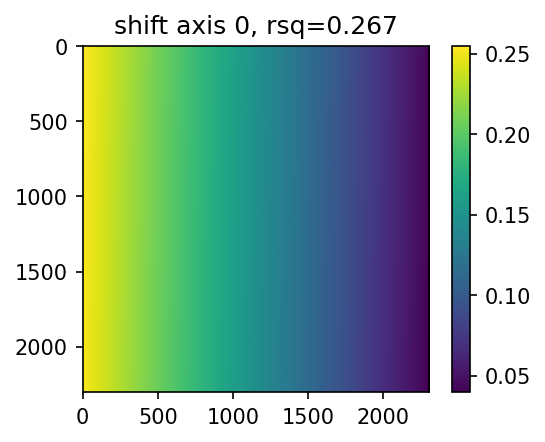

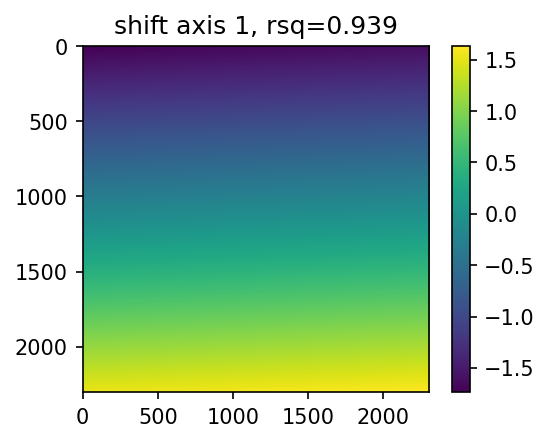

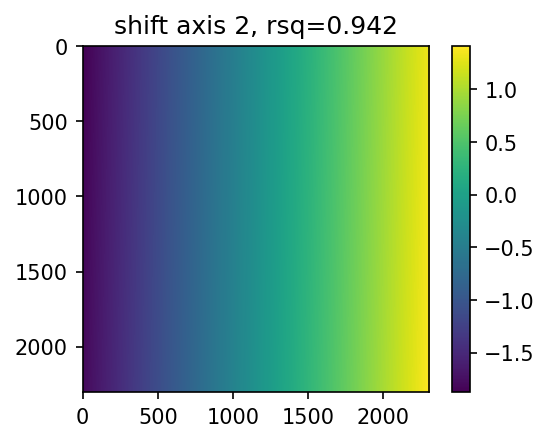

In [22]:
chromatic_pfs, chromatic_consts = chromatic.Generate_chromatic_abbrevation(
    cc_folder, ref_folder, chromatic_channel=chromatic_channel,
    ref_channel=chromatic_ref_channel,
    fiducial_channel=fiducial_channel,
    num_threads=15, start_fov=0, num_images=45,
    parallel=True,
    correction_folder=correction_folder, overwrite_profile=False,
    save_folder=correction_folder,
)

# Bleedthrough correction

In [29]:
# bleedthrough channels:
from ChromAn.src.correction_tools import bleedthrough

In [28]:
reload(bleedthrough)

<module 'ChromAn.src.correction_tools.bleedthrough' from '/lab/weissman_imaging/puzheng/Softwares/ChromAn/src/correction_tools/bleedthrough.py'>

In [24]:
bleedthrough_folders = folders[:3]
bleedthrough_testfile = os.path.join(bleedthrough_folders[0], fovs[1]) # test file
print(bleedthrough_testfile)

/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_01.dax


In [22]:
channels, infos = color_usage_df.get_channel_info_for_round(os.path.basename(bleedthrough_folders[0]))
ref_channel = [_ch for _ch, _info in zip(channels, infos) if _info not in ['empty', 'beads', 'DAPI']][0]

In [25]:
bleedthrough.find_bleedthrough_pairs(bleedthrough_testfile, ref_channel, corr_channels=channels[:4],
                                     seeding_args={'th_seed':1000, 'max_num_seeds':300,}
                                    )

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_01.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_01_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  30 2304 2304]
- Loaded images for channels:['748', '637', '545', '477'] in 11.589s.
-- fit spots in channel: 748, 300 fitted in 45.423s.
--- finding matched bleedthrough pairs for 748_to_637
--- finding matched bleedthrough pairs for 748_to_545
--- finding matched bleedthrough pairs for 748_to_477
-- channel 748 doesn't match 748, skip saving.
--- saving 300 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/bleedthrough_Conv_zscan_01_ref_748_to_637.pkl
--- saving 300 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/bleedthrough_Conv_zscan_01_ref_748_to_545.pkl
--- saving 300 points to file:/lab

{'748_to_637': [{'coord': Spots3D([  27.164549,  643.68164 , 1510.3232  ], dtype=float32),
   'spot': Spots3D([ 5.6798773e+04,  2.7164549e+01,  6.4368164e+02,  1.5103232e+03,
             1.8779096e+04,  1.5714133e+00,  2.1040611e+00,  1.9734379e+00,
             5.3411102e-01, -1.7442133e-01,  1.8459650e+03], dtype=float32),
   'ref_im': array([[[14608, 14700, 15467, 15384, 15478, 15138, 14295, 14337, 14422],
           [15301, 15355, 15923, 16466, 16381, 16247, 16071, 15374, 15167],
           [15517, 16349, 16962, 18150, 18551, 18207, 18253, 16937, 16557],
           [16258, 17190, 18513, 19709, 20671, 20972, 19873, 18611, 18010],
           [17193, 18543, 19850, 21285, 22581, 23085, 21786, 19993, 18623],
           [17408, 19233, 21025, 22537, 23922, 23665, 22722, 20459, 18500],
           [17624, 18891, 20856, 22826, 23918, 23358, 22800, 20532, 18884],
           [17306, 18995, 20463, 21807, 22869, 22704, 21456, 19384, 18166],
           [16515, 18064, 19094, 20230, 21046, 20611, 

In [31]:
# run parallel version of bleedthrough correction generation
bleedthrough_profiles = bleedthrough.Generate_bleedthrough_correction(bleedthrough_folders, channels[:4],
                                                                       num_threads=15, num_images=60,
                                                                       parallel=True,
                                                                       overwrite_profile=False,
                                                                       save_folder=correction_folder,
                                                                      )

-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  30 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 12.137s.
+ generating bleedthrough profiles.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_02.daxInitialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_03.daxInitialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_01.daxInitialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_05.daxInitialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_03.daxInitialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_04.daxInitialize DaxProcesser for file:/lab/weissman_imaging/puz

In [6]:
test_filename = os.path.join(bleedthrough_folders[0], fovs[0])

In [12]:
bleed_infos = bleedthrough.find_bleedthrough_pairs(
    test_filename, '748', corr_channels=color_usage_df.get_channels(color_usage_df)[:4],
    seeding_args={'th_seed':500,}
)

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_00.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_00_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  30 2304 2304]
- Loaded images for channels:['748', '637', '545', '477'] in 13.316s.
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

62550 fitted in 6991.295s.
--- finding matched bleedthrough pairs for 748_to_748


KeyError: '748_to_748'

['748', '637', '545', '477']

In [68]:
reload(dax_process)

<module 'ChromAn.src.file_io.dax_process' from '/lab/weissman_imaging/puzheng/Softwares/ChromAn/src/file_io/dax_process.py'>

In [50]:
from ChromAn.src.visual_tools.interactive import imshow_mark_3d

In [54]:
coord_dict = {
    'coords':np.concatenate([dax.spots_748.to_coords(),ref_dax.spots_637.to_coords()]),
    'class_ids': list(0 * np.ones(len(dax.spots_748))) + list(1 * np.ones(len(ref_dax.spots_637)))
}

In [66]:
infos = find_chromatic_spot_pairs(os.path.join(cc_folder, fovs[0]), 
                          os.path.join(ref_folder, fovs[0]), 
                          ca_channel=chromatic_channel,
                          ref_channel=chromatic_ref_channel,
                          fiducial_channel=fiducial_channel,
                          correction_args={'correction_folder':correction_folder},
                         )

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_00.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_00_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
- Loaded images for channels:['637', '477'] in 1.039s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
-- loading illumination correction profile from file:
	 637 illumination_correction_637_2304x2304.npy
	 477 illumination_correction_477_2304x2304.npy
-- corrected illumination for channel 637 in 3.123s.
-- corrected illumination for channel 477 in 3.172s.
- Finished illumination correction in 6.337s.
-- fit spots in channel: 637, 199 fitted in 37.852s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1pr

NameError: name 'pickle' is not defined

<IPython.core.display.Javascript object>


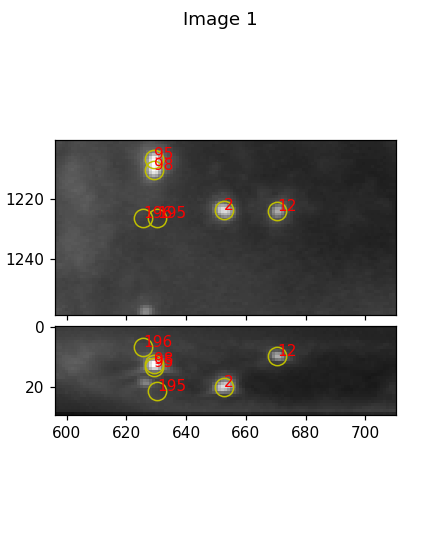

In [55]:
%matplotlib notebook
imshow_mark_3d([dax.im_748, ref_dax.im_637], use_dict=coord_dict)

In [57]:
_ref_spots = getattr(ref_dax, f"spots_{637}")
_ca_spots = getattr(dax, f"spots_{748}")

In [58]:
from ChromAn.src.spot_tools.match_spots import find_paired_centers

In [38]:
getattr(ref_dax, f"spots_{chromatic_ref_channel}")

Spots3D([[ 6.6895414e+04,  1.6890285e+01,  1.8859056e+02, ...,
           3.6476934e-01,  2.1872811e-01,  2.6631758e+03],
         [ 3.1387322e+04,  1.9083902e+01,  1.2241821e+03, ...,
           5.6831932e-01, -1.6405219e-02,  1.1015238e+03],
         [ 2.6934783e+04,  2.4537216e+01,  1.2190223e+03, ...,
           4.8760164e-01, -5.8274537e-02,  9.3717957e+02],
         ...,
         [ 1.1336667e+03,  1.2410753e+01,  2.0413334e+03, ...,
           4.3945140e-01,  3.3159576e-02,  6.4934448e+01],
         [ 1.0593964e+03,  1.6150572e+01,  1.0524681e+03, ...,
           5.5229557e-01,  1.8402332e-01,  7.1796303e+01],
         [ 1.2083524e+03,  1.0873021e+01,  1.7295068e+03, ...,
           4.4668210e-01, -9.0279892e-02,  4.9858261e+01]], dtype=float32)

In [65]:
def find_chromatic_spot_pairs(ca_filename:str,
                              ref_filename:str,
                              ca_channel:str,
                              ref_channel:str='647', fiducial_channel:str='488',
                              correction_args={},
                              drift_args={},
                              fitting_args={},
                              matching_args={},
                              crop_size=9, rsq_th=0.9,
                              save_temp=True, save_name=None,
                              overwrite=False, verbose=True, 
                              ):
    """Function to generate chromatic abbrevation spot pairs
    Parameters:
        ca_filename: chromatic abbrevation image filename, string
        
    Returns:
    """
    if 'LinearRegression' not in locals():
        from sklearn.linear_model import LinearRegression
        
    # temp_file
    _basename = os.path.basename(ca_filename).replace('.dax', f'_channel_{ca_channel}_ref_{ref_channel}.pkl')
    _basename = 'chromatic_'+_basename
    temp_filename = os.path.join(os.path.dirname(ca_filename), _basename)
    if os.path.isfile(temp_filename) and not overwrite:
        if verbose:
            print(f"-- directly load from temp_file:{temp_filename}")
        _infos = pickle.load(open(temp_filename,'rb'))
    else:
        # load reference image
        _ref_daxp = dax_process.DaxProcesser(
            ref_filename, CorrectionFolder=correction_args.get("correction_folder", None),
            FiducialChannel=fiducial_channel, RefCorrectionChannel=ref_channel,
            verbose=verbose,
        )
        _ref_daxp._load_image(sel_channels=[str(ref_channel), str(fiducial_channel)])
        _ref_daxp._corr_illumination(
            correction_channels=[str(ref_channel), str(fiducial_channel)],
            correction_pf=correction_args.get("illumination_profile", None),
        )
        # fitting
        _ref_daxp._fit_3D_spots(
            fit_channels=[str(ref_channel)], 
            channel_2_fitting_kwargs={str(ref_channel):fitting_args},
        )
        # load chromatic_abbrevated image
        _daxp = dax_process.DaxProcesser(
            ca_filename, CorrectionFolder=correction_args.get("correction_folder", None),
            FiducialChannel=fiducial_channel, RefCorrectionChannel=ref_channel,
            verbose=verbose,
        )
        _daxp._load_image(sel_channels=[str(ca_channel), str(fiducial_channel)])
        _daxp._corr_illumination(
            correction_channels=[str(ca_channel), str(fiducial_channel)],
            correction_pf=correction_args.get("illumination_profile", None),
        )
        _daxp._calculate_drift(
            RefImage=getattr(_ref_daxp, f"im_{fiducial_channel}"),
            drift_kwargs=drift_args,
        )
        _daxp._corr_warpping_drift_chromatic(
            correction_channels=[str(ca_channel)],
            corr_drift=True, corr_chromatic=False,
            ref_channel=ref_channel,
        )
        # fitting
        _daxp._fit_3D_spots(
            fit_channels=[str(ca_channel)], 
            channel_2_fitting_kwargs={str(ca_channel):fitting_args},
            channel_2_seeds={str(ca_channel):\
                             getattr(_ref_daxp, f"spots_{ref_channel}")
                            }
        )

        # extract spots
        _ref_spots = getattr(_ref_daxp, f"spots_{ref_channel}")
        _ca_spots = getattr(_daxp, f"spots_{ca_channel}")
        
        from spot_tools.match_spots import find_paired_centers
        _new_dft, _ca_cts, _ref_cts = find_paired_centers(_ca_spots, _ref_spots,
                            **matching_args,
                            return_paired_cts=True,
                           )
        
        # loop through each spot, crop
        from file_io.image_crop import crop_neighboring_area
        _infos = []
        for _ca_ct, _ref_ct in zip(_ca_cts, _ref_cts):
            # crop images
            _rim = crop_neighboring_area(getattr(ref_dax, f"im_{ref_channel}"), 
                                         _ref_ct, crop_sixze)
            _cim = crop_neighboring_area(getattr(dax, f"im_{ca_channel}"), 
                                         _ca_ct, crop_size)
            # calculate r-square
            _x = np.ravel(_rim)[:,np.newaxis]
            _y = np.ravel(_cim)
            _reg = LinearRegression().fit(_x,_y)        
            _rsq = _reg.score(_x,_y)
            
            if _rsq >= rsq_th:
                _info_dict = {
                    'ref_coord': _ref_ct,
                    'ca_coord': _ca_ct,
                    'drift': _daxp.drift,
                    'ref_im': _rim,
                    'ca_im': _cim,
                    'rsquare': _rsq,
                    'slope': _reg.coef_,
                    'intercept': _reg.intercept_,
                    'ca_file':ca_filename,
                    'ref_file':ref_filename,
                }
                _infos.append(_info_dict)

        if save_temp:
            if verbose:
                print(f"--- saving {len(_infos)} points to file:{temp_filename}")
            pickle.dump(_infos, open(temp_filename, 'wb'))
    
    return _infos